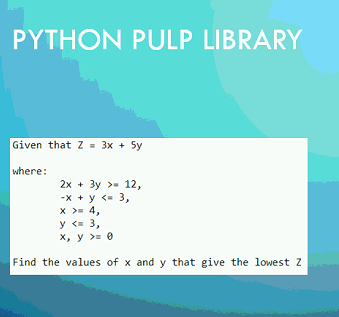

In [1]:
!pip install pulp

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 14.3/14.3 MB 11.3 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
#objective funcion, variable, constraints
import pulp
problem = pulp.LpProblem("example1",pulp.LpMinimize) #Naming convention
x = pulp.LpVariable("x", lowBound = 0)
y = pulp.LpVariable("y", lowBound = 0)

problem += 3 * x + 5 * y
problem += 2 * x + 3 * y >=12
problem += -x + y <= 3
problem += x >= 4
problem += y <= 3

status = problem.solve()
print(problem)
print(pulp.LpStatus[status])
print(pulp.value(x), pulp.value(y), pulp.value(problem.objective))

example1:
MINIMIZE
3*x + 5*y + 0
SUBJECT TO
_C1: 2 x + 3 y >= 12

_C2: - x + y <= 3

_C3: x >= 4

_C4: y <= 3

VARIABLES
x Continuous
y Continuous

Optimal
6.0 0.0 18.0


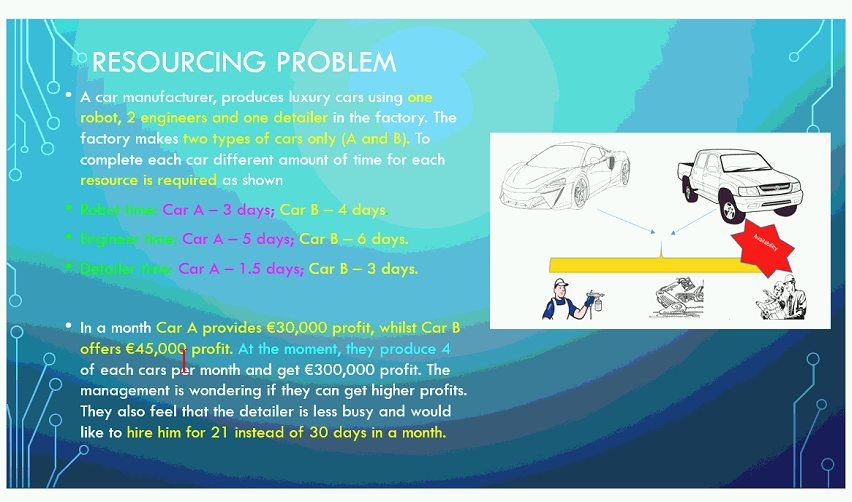

In [6]:
#Objective function, Variables, constraints
import pulp
problem = pulp.LpProblem("Profit Maximization", pulp.LpMaximize)

#variables
a = pulp.LpVariable("A", lowBound = 0, cat = "Integer") #cat - category
b = pulp.LpVariable("B", lowBound = 0, cat = "Integer")

#objective functions or constraints?
problem += 30000 * a+ 45000 * b
problem += 3 * a + 4 * b <= 30
problem += 5 * a + 6 * b <= 60
problem += 1.5 * a + 3 * b <= 21

status = problem.solve()
print(problem)
print(pulp.LpStatus[status])
print(pulp.value(a), pulp.value(b), pulp.value(problem.objective))

Profit_Maximization:
MAXIMIZE
30000*A + 45000*B + 0
SUBJECT TO
_C1: 3 A + 4 B <= 30

_C2: 5 A + 6 B <= 60

_C3: 1.5 A + 3 B <= 21

VARIABLES
0 <= A Integer
0 <= B Integer

Optimal
2.0 6.0 330000.0


C:\Users\pmuema\AppData\Roaming\Python\Python310\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


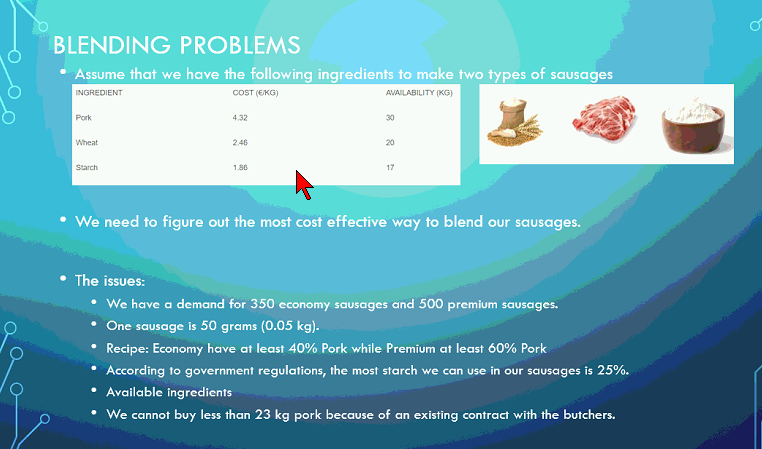

In [9]:
import pulp
problem = pulp.LpProblem("Cost Maximization", pulp.LpMinimize)
sTypes = ["Economy", "Premium"]
iTypes = ["Pork", "Wheat", "Starch"]
iWeight = pulp.LpVariable.dicts("Weight", ((i, j)for i in sTypes for j in iTypes), lowBound = 0, cat = "Continuous") #Continuous allows decimals

print(iWeight)

problem += (pulp.lpSum([4.32 * iWeight[(i, "Pork")] + 2.46 * iWeight[(i, "Wheat")] + 1.86 * iWeight[(i, "Starch")] for i in sTypes]))

problem += pulp.lpSum([iWeight["Economy", j] for j in iTypes]) == 350 * 0.05
problem += pulp.lpSum([iWeight["Premium", j] for j in iTypes]) == 500 * 0.05

problem += iWeight["Economy", "Pork"] == (0.4 * pulp.lpSum([iWeight["Economy", j] for j in iTypes]))
problem += iWeight["Premium", "Pork"] == (0.6 * pulp.lpSum([iWeight["Premium", j] for j in iTypes]))

problem += iWeight["Economy", "Starch"] == (0.25 * pulp.lpSum([iWeight["Economy", j] for j in iTypes]))
problem += iWeight["Premium", "Starch"] == (0.25 * pulp.lpSum([iWeight["Premium", j] for j in iTypes]))

problem += pulp.lpSum([iWeight[j, "Pork"] for j in sTypes]) <= 30
problem += pulp.lpSum([iWeight[j, "Wheat"] for j in sTypes]) <= 20
problem += pulp.lpSum([iWeight[j, "Starch"] for j in sTypes]) <= 70
problem += pulp.lpSum([iWeight[j, "Pork"] for j in sTypes]) >= 23


status = problem.solve()
print(problem)
print(pulp.LpStatus[status])
print(pulp.value(a), pulp.value(b), pulp.value(problem.objective))
for x in iWeight:
    xvalue = iWeight[x].varValue
    print(x[0], x[1], xValue)
    
print(pulp.value(problem.objective))
    

C:\Users\pmuema\AppData\Roaming\Python\Python310\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


{('Economy', 'Pork'): Weight_('Economy',_'Pork'), ('Economy', 'Wheat'): Weight_('Economy',_'Wheat'), ('Economy', 'Starch'): Weight_('Economy',_'Starch'), ('Premium', 'Pork'): Weight_('Premium',_'Pork'), ('Premium', 'Wheat'): Weight_('Premium',_'Wheat'), ('Premium', 'Starch'): Weight_('Premium',_'Starch')}
Cost_Maximization:
MINIMIZE
4.32*Weight_('Economy',_'Pork') + 1.86*Weight_('Economy',_'Starch') + 2.46*Weight_('Economy',_'Wheat') + 4.32*Weight_('Premium',_'Pork') + 1.86*Weight_('Premium',_'Starch') + 2.46*Weight_('Premium',_'Wheat') + 0.0
SUBJECT TO
_C1: Weight_('Economy',_'Pork') + Weight_('Economy',_'Starch')
 + Weight_('Economy',_'Wheat') = 17.5

_C2: Weight_('Premium',_'Pork') + Weight_('Premium',_'Starch')
 + Weight_('Premium',_'Wheat') = 25

_C3: 0.6 Weight_('Economy',_'Pork') - 0.4 Weight_('Economy',_'Starch')
 - 0.4 Weight_('Economy',_'Wheat') = 0

_C4: 0.4 Weight_('Premium',_'Pork') - 0.6 Weight_('Premium',_'Starch')
 - 0.6 Weight_('Premium',_'Wheat') = 0

_C5: - 0.25 Weig

NameError: name 'a' is not defined